<a href="https://colab.research.google.com/github/nadireus/AUTOSCOUT-P/blob/main/Autoscout24_all_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary info about AutoScout24

The Munich-based company AutoScout24 is one of the leading online markets for new and used cars as well as for commercial vehicles and motorcycles.If you open the website, you will first see a box in which you can enter filter criteria for the desired vehicle or motorcycle. Click on the button to display the corresponding means of transportation. On the search results page you will find 20 overview windows. of the search results page, you can see more information and pictures on the detail page.

Summary info about Project
In this project you can find the methods of cleaning and analysing of the  data,which extracted from  Atouscout24.  

used some important features during data manipulation



Manipulation: moving columns, slicing, reshaping, merging, joining, filtering, and others.

Time-series Handling: operations on date/times, resampling, moving windows and auto-alignment of datasets.

Missing Data Handling: auto-exclude, drop, replace missing values
Group-by Operations.

Summary Statistics: Fast and powerful summary statistics of data.
Visualization: Simplified access to plots on data structures, such as histograms, box plots, general plots.

Importing packages

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
import stat as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#reading jason file from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_json("/content/drive/MyDrive/Colab Notebooks/scout24_car.json", lines=True) #reading jason  file from drive

In [4]:
df.to_csv(index=False) #converting jason datas to csv

writing file to csv

In [5]:
df.to_csv('Autoscout.last.csv')

In [ ]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [6]:
df= df.rename(columns={"\nComfort & Convenience\n" : "Comfort_and_Convenience", 
                       "\nEntertainment & Media\n" : "Entertainment_and_Media",
                       "\nExtras\n" : 'Extras', 
                       "\nSafety & Security\n" : 'Safety_and_Security'})  #Rename the columns

In [ ]:
df.tail().T

,15914,15915,15916,15917,15918
url,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...
make_model,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
short_description,Blue dCi 200CV EDC Executive 4Control,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Blue dCi 200 EDC Initiale Paris Leder LED Navi...,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
body_type,Van,Van,Van,Van,Van
price,39950,39885,39875,39700,40999
vat,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,- km,"9,900 km",15 km,10 km,- km
registration,-/-,01/2019,03/2019,06/2019,01/2019
prev_owner,None,1 previous owner,1 previous owner,None,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(15919, 54)

In [ ]:
df.dtypes

url                               object
make_model                        object
short_description                 object
body_type                         object
price                              int64
vat                               object
km                                object
registration                      object
prev_owner                        object
kW                               float64
hp                                object
Type                              object
Previous Owners                   object
Next Inspection                   object
Inspection new                    object
Warranty                          object
Full Service                      object
Non-smoking Vehicle               object
null                              object
Make                              object
Model                             object
Offer Number                      object
First Registration                object
Body Color                        object
Paint Type      

In [ ]:
df.describe()

,price,kW
count,15919.000000,0.0
mean,18019.896727,NaN
std,7386.169409,NaN
min,13.000000,NaN
25%,12850.000000,NaN
50%,16900.000000,NaN
75%,21900.000000,NaN
max,74600.000000,NaN


In [7]:
df.describe(include= 'O').T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sp...,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
km,15919,6690,10 km,1045
registration,15919,48,-/-,1597
prev_owner,9091,4,1 previous owner,8294
hp,15919,81,85 kW,2542
Type,15917,169,"[, Used, , Diesel (Particulate Filter)]",3475


In [ ]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['price' 'kW']


In [ ]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

['url' 'make_model' 'short_description' 'body_type' 'vat' 'km'
 'registration' 'prev_owner' 'hp' 'Type' 'Previous Owners'
 'Next Inspection' 'Inspection new' 'Warranty' 'Full Service'
 'Non-smoking Vehicle' 'null' 'Make' 'Model' 'Offer Number'
 'First Registration' 'Body Color' 'Paint Type' 'Body Color Original'
 'Upholstery' 'Body' 'Nr. of Doors' 'Nr. of Seats' 'Model Code'
 'Gearing Type' 'Displacement' 'Cylinders' 'Weight' 'Drive chain' 'Fuel'
 'Consumption' 'CO2 Emission' 'Emission Class' 'Comfort_and_Convenience'
 'Entertainment_and_Media' 'Extras' 'Safety_and_Security' 'description'
 'Emission Label' 'Gears' 'Country version' 'Electricity consumption'
 'Last Service Date' 'Other Fuel Types' 'Availability'
 'Last Timing Belt Service Date' 'Available from']


#**#The chart below demonstrates the missing data patterns of the first 30 features.**

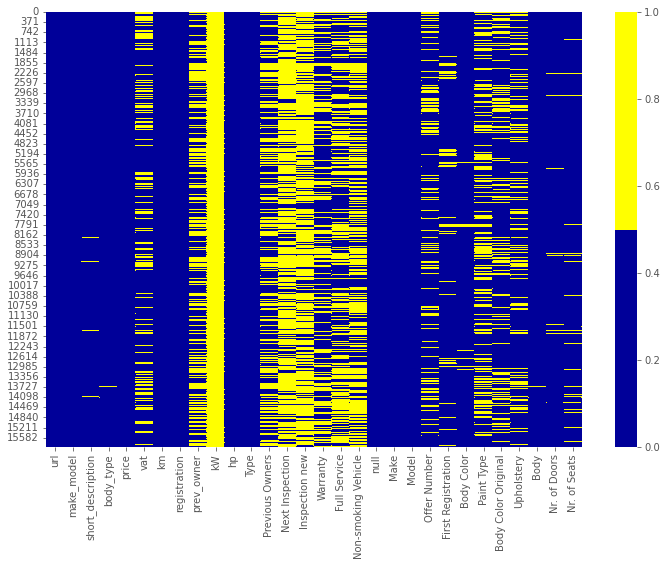

In [ ]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

##Missing Data Percentage List

In [ ]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

url - 0%
make_model - 0%
short_description - 0%
body_type - 0%
price - 0%
vat - 28%
km - 0%
registration - 0%
prev_owner - 43%
kW - 100%
hp - 0%
Type - 0%
Previous Owners - 42%
Next Inspection - 78%
Inspection new - 75%
Warranty - 34%
Full Service - 48%
Non-smoking Vehicle - 55%
null - 0%
Make - 0%
Model - 0%
Offer Number - 20%
First Registration - 10%
Body Color - 4%
Paint Type - 36%
Body Color Original - 24%
Upholstery - 23%
Body - 0%
Nr. of Doors - 1%
Nr. of Seats - 6%
Model Code - 69%
Gearing Type - 0%
Displacement - 3%
Cylinders - 36%
Weight - 44%
Drive chain - 43%
Fuel - 0%
Consumption - 12%
CO2 Emission - 11%
Emission Class - 19%
Comfort_and_Convenience - 6%
Entertainment_and_Media - 9%
Extras - 19%
Safety_and_Security - 6%
description - 0%
Emission Label - 75%
Gears - 30%
Country version - 52%
Electricity consumption - 99%
Last Service Date - 96%
Other Fuel Types - 94%
Availability - 96%
Last Timing Belt Service Date - 100%
Available from - 98%


##Missing Data Histogram

created missing indicator for: short_description
created missing indicator for: body_type
created missing indicator for: vat
created missing indicator for: prev_owner
created missing indicator for: kW
created missing indicator for: Type
created missing indicator for: Previous Owners
created missing indicator for: Next Inspection
created missing indicator for: Inspection new
created missing indicator for: Warranty
created missing indicator for: Full Service
created missing indicator for: Non-smoking Vehicle
created missing indicator for: Offer Number
created missing indicator for: First Registration
created missing indicator for: Body Color
created missing indicator for: Paint Type
created missing indicator for: Body Color Original
created missing indicator for: Upholstery
created missing indicator for: Body
created missing indicator for: Nr. of Doors
created missing indicator for: Nr. of Seats
created missing indicator for: Model Code
created missing indicator for: Displacement
created

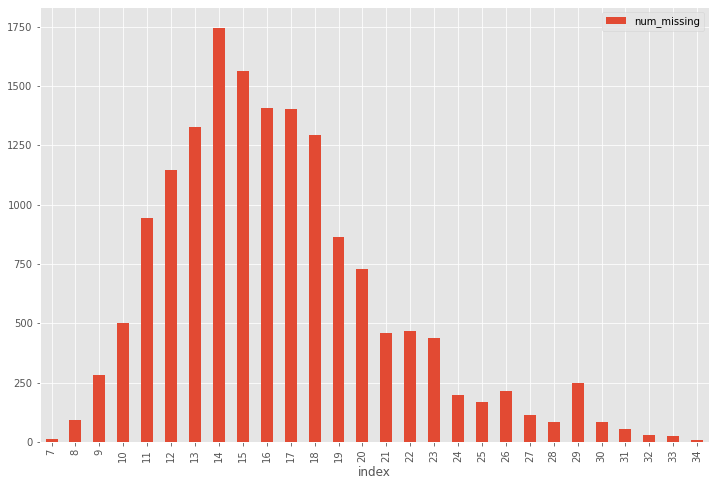

In [ ]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

plt.show()

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
#for char in spec_chars:
    #df['title'] = df['title'].str.replace(char, ' ')

#special  functions for missingvalue handling

In [8]:
def fillallmeth(df, group_col1, group_col2, col_name, method): # method can be "mode" or "mean" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())


    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].mean())

    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [9]:
def fillmean(df, group_col1, col_name,method): # method can be  "mean" 
    if method == "mean":
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())

In [10]:
def fill_most(df, group_col, col_name):
    #Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [11]:
def fill_prop(df, group_col, col_name):
    #Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

#***1-url***

In [12]:
df.drop(['url'], axis=1, inplace=True)# url has no affect on price so we can directly drop it

#***2-make_model***

In [13]:
df['make_model'].astype(str)

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15914    Renault Espace
15915    Renault Espace
15916    Renault Espace
15917    Renault Espace
15918    Renault Espace
Name: make_model, Length: 15919, dtype: object

In [ ]:
#df['make_model'].str.get_dummies()

#***4-body_type***

In [14]:
df['body_type'].astype(str)

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15919, dtype: object

In [ ]:
df['body_type'].isnull().sum()

60

In [15]:
fill_most(df,"make_model",'body_type')#filling missing values by grouping make and model of cars

Number of NaN :  0
------------------
Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [ ]:
df['body_type'].str.get_dummies()

#***5-Price***

In [ ]:
df['price']

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 15919, dtype: int64

In [ ]:
df['price'].isnull().sum()

0

#***6-vat~~~~~~~~*** 

In [ ]:
df['vat'].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [ ]:
df['vat'].isnull().sum() #missing values need to be handled

4513

In [34]:
fillallmeth(df, "price","age","vat", "ffill")

Number of NaN :  0
------------------
VAT deductible      14968
Price negotiable      951
Name: vat, dtype: int64


#***7-km***

In [17]:
df["km"]=df["km"].str.strip('-').str.strip('km')#deleting replace ,
df["km"]

0        56,013 
1        80,000 
2        83,450 
3        73,000 
4        16,200 
          ...   
15914           
15915     9,900 
15916        15 
15917        10 
15918           
Name: km, Length: 15919, dtype: object

In [18]:
df["km"]=df["km"].str.replace(',','', regex=True)

In [19]:
df["km"] =pd.to_numeric(df["km"], errors='coerce').astype('float')
df["km"]

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64

In [ ]:
df.km.value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
8329.0        1
267.0         1
1060.0        1
73652.0       1
49320.0       1
Name: km, Length: 6690, dtype: int64

In [36]:
fillmean(df,"age","km","mean")

In [37]:
df.km.value_counts(dropna=False)

10.000000       1045
1647.362609      985
1.000000         367
5.000000         170
50.000000        148
                ... 
79930.000000       1
267.000000         1
8329.000000        1
1060.000000        1
15577.000000       1
Name: km, Length: 6692, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


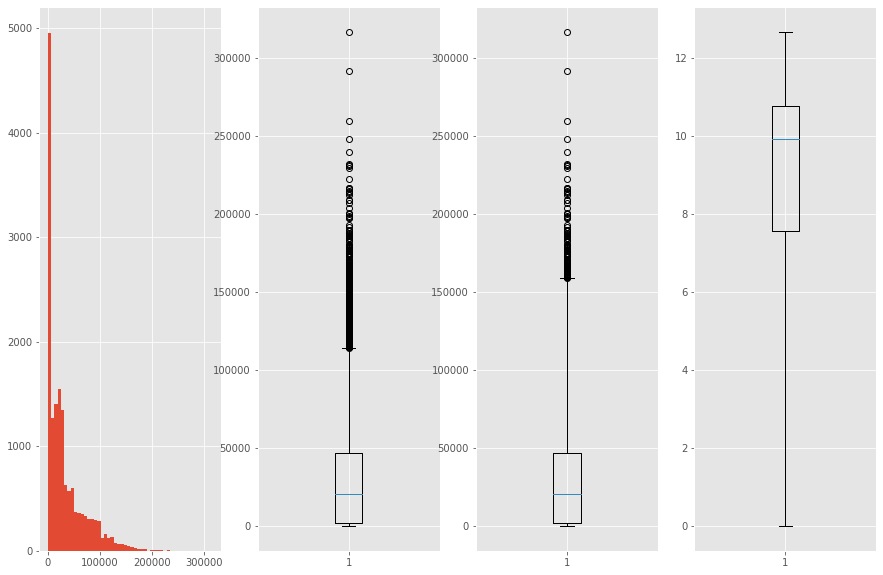

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()

We cannot drop outleirs because km of the cars can vary in a different range and up to their ages

In [ ]:
#df["km"].fillna(df.groupby("age").km.transform("mean"))

#***8-registration*** 

In [39]:
df["registration"] =  df["registration"].str.strip('-/-')
df["registration"]

0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914           
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object

In [40]:
df["registration"] =  pd.to_datetime(df["registration"]) #calculate
df["registration"]

0       2016-01-01
1       2017-03-01
2       2016-02-01
3       2016-08-01
4       2016-05-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-03-01
15917   2019-06-01
15918   2019-01-01
Name: registration, Length: 15919, dtype: datetime64[ns]

In [41]:
df.drop(["registration"],axis=1, inplace=True)

#***9-	prev_owner***

In [ ]:
df["prev_owner"] =  df["prev_owner"].str.strip('previous owners') #compare to type in order to fillna in type
df["prev_owner"]

0           2
1        None
2           1
3           1
4           1
         ... 
15914    None
15915       1
15916       1
15917    None
15918       1
Name: prev_owner, Length: 15919, dtype: object

In [ ]:
df["prev_owner"].fillna('-',inplace=True)

In [ ]:
df.groupby("prev_owner")["price"].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
prev_owner,,,,,,,,
-,6828.0,19353.881664,8237.158623,13.0,13100.0,18500.0,23880.0,64900.0
1,8294.0,17215.676031,6575.136893,5250.0,12680.0,16275.0,20840.0,74600.0
2,778.0,14953.494859,5208.806727,6400.0,10950.0,14990.0,17537.5,35990.0
3,17.0,14676.235294,5901.805894,7500.0,10598.0,13100.0,17900.0,27000.0
4,2.0,20150.000000,1626.345597,19000.0,19575.0,20150.0,20725.0,21300.0


In [42]:
df.drop(["prev_owner"], axis=1, inplace=True)

#***10-kW***

In [ ]:
df['kW'].isnull().sum()

15919

In [ ]:
df.drop(['kW'], axis=1)# kW has no affect on price so we can directly drop it

#***11-hp***

it is easier to make more power with more cylinders. If one has two engines of similar displacement, the engine with more cylinders will generally produce more power

In [44]:
df["hp"] = df.hp.str.extract('(\d+)').astype('float')

In [45]:
df["hp"].isnull().sum()

88

In [55]:
df["hp"].value_counts(dropna=False)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
75.0        1
115.0       1
137.0       1
132.0       1
84.0        1
Name: hp, Length: 81, dtype: int64

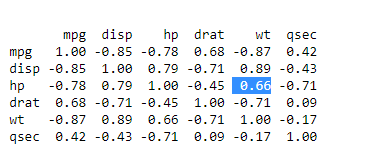

In [84]:
fillallmeth(df, "Cylinders","Displacement","hp", "mean")

Number of NaN :  0
------------------
85.000000     2542
66.000000     2122
81.000000     1402
100.000000    1308
110.000000    1112
              ... 
195.000000       1
137.000000       1
123.000000       1
95.500000        1
76.917263        1
Name: hp, Length: 95, dtype: int64


#***12-Type***

In [85]:
df["Type"]=df["Type"].apply(lambda item: item[1] if type (item) == list else item) #cleanig the column irrelavant values,gettting the intended values
df["Type"]

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [86]:
df["Type"].replace('Pre-registered', 'Used',regex=True, inplace= True)

In [87]:
df["Type"].replace("Employee's car", 'Used',regex=True, inplace= True)

In [88]:
df["Type"].replace("Demonstration", 'Used',regex=True, inplace= True)

In [89]:
fill_most(df, "age", "Type")

Number of NaN :  0
------------------
Used    14269
New      1650
Name: Type, dtype: int64


In [ ]:
df["Type"].value_counts(dropna=False)

Used    14265
New      1650
4           2
NaN         2
Name: Type, dtype: int64

In [ ]:
df.groupby('Type')["price"].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
New,1650.0,23769.290303,8472.449712,120.0,18206.25,23139.0,27804.0,64332.0
Used,14267.0,17354.461835,6950.243057,13.0,12480.00,16280.0,20990.0,74600.0


In [ ]:
df.groupby('Type')["price"].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Demonstration,796.0,25774.386935,10040.523420,8990.0,17890.00,24890.0,33590.0,68320.0
Employee's car,1011.0,18398.100890,5688.210640,6950.0,14857.50,18800.0,21745.0,47590.0
New,1650.0,23769.290303,8472.449712,120.0,18206.25,23139.0,27804.0,64332.0
Pre-registered,1364.0,20743.063050,8223.419727,6950.0,11489.00,21470.0,26200.0,48490.0
Used,11096.0,16238.795692,5982.753241,13.0,11980.00,15850.0,19750.0,74600.0


#***13-Previous Owners***

In [ ]:
df["Previous Owners"]=df["Previous Owners"].str.strip('\n')
df["Previous Owners"]

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918      1
Name: Previous Owners, Length: 15919, dtype: object

In [ ]:
df.drop(["Previous Owners"], axis=1)# Previous Owners and Type contain same information 

#***14-Next Inspection***

In [ ]:
df["Next Inspection"]=df["Next Inspection"].apply(lambda item: item[0] if type (item) == list else item) #cleanig the column irrelavant values,gettting the intended values
df["Next Inspection"]

0        \n06/2021\n
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
15914            NaN
15915    \n01/2022\n
15916            NaN
15917            NaN
15918            NaN
Name: Next Inspection, Length: 15919, dtype: object

In [ ]:
df["Next Inspection"]=df["Next Inspection"].str.strip('\n')

In [ ]:
df["Next Inspection"].value_counts(dropna=False)

NaT           15209
2022-04-01       62
2021-03-01       38
2022-03-01       36
2021-06-01       34
              ...  
1999-01-01        1
2018-06-01        1
2019-01-01        1
2018-08-01        1
1955-01-01        1
Name: Next Inspection, Length: 65, dtype: int64

In [ ]:
df["Next Inspection"] =  pd.to_datetime(df["Next Inspection"])
df["Next Inspection"]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Next Inspection, Length: 15919, dtype: datetime64[ns]

In [ ]:
df.drop(["Next Inspection"], axis=1)# Next Inspection and Inspection new  contain same information

#***15-Inspection new***

In [ ]:
df["Inspection new"]=df["Inspection new"].apply(lambda item: item[0] if type (item) == list else item)
df["Inspection new"]

0        \nYes\n
1            NaN
2            NaN
3            NaN
4        \nYes\n
          ...   
15914        NaN
15915        NaN
15916    \nYes\n
15917        NaN
15918    \nYes\n
Name: Inspection new, Length: 15919, dtype: object

In [ ]:
df["Inspection new"]=df["Inspection new"].str.strip('\n')

In [ ]:
fill_most(df, "age", "Inspection new")

Number of NaN :  0
------------------
Yes    15919
Name: Inspection new, dtype: int64


In [92]:
df.drop("Inspection new", axis=1, inplace=True)

#***16-Warranty***

In [93]:
df["Warranty"]=df["Warranty"].apply(lambda item: item[0] if type (item) == list else item) #cleanig the column irrelavant values,gettting the intended values
df["Warranty"]

0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917               \n
15918              NaN
Name: Warranty, Length: 15919, dtype: object

In [94]:
df["Warranty"]=df["Warranty"].str.strip('\n').str.strip('months')#.str.strip('inf')
df["Warranty"]

0           
1        NaN
2           
3        NaN
4           
        ... 
15914    24 
15915       
15916       
15917       
15918    NaN
Name: Warranty, Length: 15919, dtype: object

In [95]:
df["Warranty"]=df["Warranty"].str.strip("\''")

In [ ]:
df.groupby(["Warranty"])['price'].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Warranty,,,,,,,,
,5646.0,18976.718385,6974.574757,120.0,14480.00,17980.0,22396.75,64298.0
1,3.0,18383.333333,4269.292486,13455.0,17100.00,20745.0,20847.50,20950.0
10,1.0,19990.000000,NaN,19990.0,19990.00,19990.0,19990.00,19990.0
11,2.0,20897.000000,8341.031591,14999.0,17948.00,20897.0,23846.00,26795.0
12,2594.0,15659.426754,5810.190585,5250.0,11410.00,14950.0,18990.00,51900.0
13,3.0,16746.666667,6298.137291,9500.0,14670.00,19840.0,20370.00,20900.0
14,2.0,24990.000000,1414.213562,23990.0,24490.00,24990.0,25490.00,25990.0
15,1.0,21450.000000,NaN,21450.0,21450.00,21450.0,21450.00,21450.0
16,4.0,24730.750000,11677.216660,10893.0,18960.75,24570.0,30340.00,38890.0


In [96]:
fill_most(df, "age", "Warranty")

Number of NaN :  0
------------------
       9397
12     4263
24     1118
60      401
36      279
48      149
6       125
72       59
3        33
23       11
18       10
20        7
25        6
2         5
50        4
16        4
26        4
34        3
1         3
13        3
4         3
19        3
21        2
17        2
28        2
14        2
11        2
46        2
22        2
9         2
45        2
65        1
15        1
8         1
56        1
10        1
33        1
47        1
49        1
30        1
7         1
40        1
Name: Warranty, dtype: int64


#***17-Full Service***

In [97]:
df["Full Service"]=df["Full Service"].apply(lambda item : item[0] if type(item)== list else item)
df["Full Service"]

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915    NaN
15916     \n
15917    NaN
15918    NaN
Name: Full Service, Length: 15919, dtype: object

In [ ]:
df["Full Service"]=df["Full Service"].str.strip('/n').value_counts(dropna=False)
df["Full Service"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: Full Service, Length: 15919, dtype: float64

In [ ]:
df["Full Service"].isnull().sum()

15919

In [ ]:
df.drop(["Full Service"], axis=1)# There is not any information in this column

#***18-Non-smoking Vehicle***

In [ ]:
df["Non-smoking Vehicle"].value_counts()

In [ ]:
df["Non-smoking Vehicle"]=df["Non-smoking Vehicle"].apply(lambda item : item[0] if type(item)== list else item)

In [ ]:
df["Non-smoking Vehicle"]=df["Non-smoking Vehicle"].str.strip('\n')

In [ ]:
df["Non-smoking Vehicle"].value_counts()

    7177
Name: Non-smoking Vehicle, dtype: int64

In [ ]:
df["Non-smoking Vehicle"].unique()

array(['', nan], dtype=object)

In [ ]:
df.drop(["Non-smoking Vehicle"], axis=1)#This column does not contain useful informations

#***19-null***

In [ ]:
df["null"].value_counts()

In [ ]:
df.drop(["null"], axis=1)#This column contains only empty list

#***20-Make***

In [ ]:
df.drop(["Make"], axis=1)#This column contains same informations with make-model cloumn so we dont need this column

#***21-Model***

In [ ]:
df.drop(["Model"], axis=1)#This column contains same informations with make-model cloumn so we dont need this column

#***22-Offer Number***

In [ ]:
df.drop(["Offer Number"], axis=1)#This column does not contain useful informations

# ***23-Age-First Registration***

In [20]:
df["First Registration"]=df["First Registration"].apply(lambda item : item[1] if type(item)== list else item)
df["First Registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [21]:
df["First Registration"]=  pd.to_datetime(df["First Registration"])
df["First Registration"]

0       2016-01-01
1       2017-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-01-01
15917   2019-01-01
15918   2019-01-01
Name: First Registration, Length: 15919, dtype: datetime64[ns]

In [22]:
today = pd.to_datetime("2019-01-01")
print(today)

2019-01-01 00:00:00


In [23]:
df['diff_year'] =(today)-df["First Registration"]
df['diff_year'] 

0       1096 days
1        730 days
2       1096 days
3       1096 days
4       1096 days
           ...   
15914         NaT
15915      0 days
15916      0 days
15917      0 days
15918      0 days
Name: diff_year, Length: 15919, dtype: timedelta64[ns]

In [24]:
df['age'] =round( df['diff_year'] / np.timedelta64(1, 'Y'),1)
df['age']

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

In [25]:
df['age'].fillna('-', inplace=True)

In [26]:
df['age'].value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
-      1597
Name: age, dtype: int64

In [27]:
cond1 = (df['km'] < 10000)
cond2 = ((df['km'] >= 10000) & (df['km'] < 28000))
cond3 = ((df['km'] >= 28000) & (df['km'] < 50000))
cond4 = (df['km'] >= 50000)

In [28]:
df.loc[cond1,'age'] = df.loc[cond1,'age'].replace('-', 0)
df.loc[cond2,'age'] = df.loc[cond2,'age'].replace('-', 1)
df.loc[cond3,'age'] = df.loc[cond3,'age'].replace('-', 2)
df.loc[cond4,'age'] = df.loc[cond4,'age'].replace('-', 3)

In [35]:
df["age"] =pd.to_numeric(df["age"], errors='coerce').astype('float')
df["age"]

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    0.0
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

In [29]:
df.groupby('age').km.mean()

age
0.0     1647.362609
1.0    18035.130067
2.0    41748.576923
3.0    77450.062789
-               NaN
Name: km, dtype: float64

In [30]:
df['age'].replace('-',0, inplace=True)

In [31]:
df.drop(['diff_year'],axis=1,inplace=True)

In [33]:
df.drop(["First Registration"],axis=1,inplace=True)

# ***24-Body Color***

In [104]:
df["Body Color"]=df["Body Color"].apply(lambda item : item[1] if type(item)== list else item)
df["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

In [ ]:
df["Body Color"].value_counts(dropna=False)

Black     3744
Grey      3504
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
4            2
Name: Body Color, dtype: int64

In [105]:
fillallmeth(df,"make_model", "body_type", "Body Color", 'mode')

Number of NaN :  0
------------------
Black     3941
Grey      3839
White     3469
Silver    1647
Blue      1431
Red        957
Brown      289
Green      158
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64


In [ ]:

#df["Body Color"].str.get_dummies()

# ***25-Paint Type***

In [106]:
df["Paint Type"]=df["Paint Type"].apply(lambda item : item[0] if type(item)== list else item)
df["Paint Type"]

0        \nMetallic\n
1                 NaN
2        \nMetallic\n
3        \nMetallic\n
4        \nMetallic\n
             ...     
15914    \nMetallic\n
15915    \nMetallic\n
15916             NaN
15917             NaN
15918    \nMetallic\n
Name: Paint Type, Length: 15919, dtype: object

In [107]:
df["Paint Type"]=df["Paint Type"].str.strip('\n')
df["Paint Type"]

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: Paint Type, Length: 15919, dtype: object

In [108]:
fillallmeth(df,"make_model",  "Body Color","Paint Type", 'mode')

Number of NaN :  0
------------------
Metallic       15547
Uni/basic        364
Perl effect        8
Name: Paint Type, dtype: int64


# ***26-Body Color Original***

In [ ]:
df["Body Color Original"]=df["Body Color Original"].apply(lambda item : item[0] if type(item)== list else item)
df["Body Color Original"]

0                 \nMythosschwarz\n
1                               NaN
2        \nmythosschwarz metallic\n
3                               NaN
4        \nMythosschwarz Metallic\n
                    ...            
15914              \nGrigio scuro\n
15915       \nStahl-Grau Metallic\n
15916               \narktis-weiß\n
15917                    \nGrigio\n
15918    \nTitanium-Grau Metallic\n
Name: Body Color Original, Length: 15919, dtype: object

In [ ]:
df["Body Color Original"]=df["Body Color Original"].str.strip('\n')
df["Body Color Original"]

0                 Mythosschwarz
1                           NaN
2        mythosschwarz metallic
3                           NaN
4        Mythosschwarz Metallic
                  ...          
15914              Grigio scuro
15915       Stahl-Grau Metallic
15916               arktis-weiß
15917                    Grigio
15918    Titanium-Grau Metallic
Name: Body Color Original, Length: 15919, dtype: object

In [ ]:
df["Body Color Original"]=df["Body Color Original"].str.strip('Metallic').str.strip('metallic')
df["Body Color Original"]

0          ythosschwarz
1                   NaN
2         ythosschwarz 
3                   NaN
4         ythosschwarz 
              ...      
15914      Grigio scuro
15915       Stahl-Grau 
15916        rktis-weiß
15917            Grigio
15918    Titanium-Grau 
Name: Body Color Original, Length: 15919, dtype: object

In [109]:
df.drop(["Body Color Original"], axis=1, inplace=True)

# ***27-Upholstery***

In [110]:
upholstery_type = ['Cloth', 'Part leather', 'Full leather', 'alcantara', 'Velour', 'Other']
upholstery_color = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White', 'Red', 'Yellow', 'Orange', 'Other']
def uphols_type(x):
    if type(x) == list:
        if x[0].strip().split(', ')[0] in upholstery_type: return x[0].strip().split(', ')[0]
        else: return None
    else:
        return None
def uphols_color(x):
    if type(x) == list:
        if x[0].strip().split(', ')[-1] in upholstery_color: return x[0].strip().split(', ')[-1]
        else: return None
    else:
        return None   
df['Upholstery_Type'] = df['Upholstery'].apply(uphols_type)
df['Upholstery_Color'] = df['Upholstery'].apply(uphols_color)

In [ ]:
pd.get_dummies(df['Upholstery_Type'], prefix='upholstery',prefix_sep='_')

In [ ]:
df.groupby('Upholstery_Color')['price'].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Upholstery_Color,,,,,,,,
Beige,54.0,21502.111111,7958.450839,9700.0,15309.25,19470.0,28147.50,36500.0
Black,8201.0,17954.923668,6649.465695,120.0,13500.00,16900.0,21450.00,67600.0
Blue,16.0,16143.000000,5071.398939,8750.0,12989.75,16300.0,18950.00,25900.0
Brown,207.0,31211.478261,10775.822171,10893.0,22550.00,28990.0,38345.00,68320.0
Grey,1376.0,15938.998547,6876.874353,5890.0,10550.00,14990.0,19878.75,74600.0
Orange,1.0,21400.000000,NaN,21400.0,21400.00,21400.0,21400.00,21400.0
Other,1016.0,19788.734252,7286.828661,6900.0,12980.00,19877.5,24942.50,50950.0
Red,9.0,15704.444444,3293.076491,8500.0,13980.00,17440.0,17950.00,18880.0
White,13.0,16766.153846,9974.559755,5250.0,7950.00,18000.0,22000.00,32700.0


In [112]:
fillallmeth(df,"make_model", "body_type", 'Upholstery_Color', 'mode')

Number of NaN :  0
------------------
Black     13114
Grey       1442
Other      1017
Brown       248
Beige        55
Blue         16
White        13
Red           9
Yellow        4
Orange        1
Name: Upholstery_Color, dtype: int64


In [ ]:
df.groupby('Upholstery_Type')['price'].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Upholstery_Type,,,,,,,,
Cloth,8421.0,16914.806080,5977.313126,120.0,12390.0,16135.0,20900.0,63477.0
Full leather,1009.0,27613.976214,10496.783270,8980.0,18900.0,26900.0,35100.0,74600.0
Other,368.0,16879.953804,5900.165393,7490.0,12290.0,15960.0,20491.0,50950.0
Part leather,1499.0,21655.834556,7213.313967,6999.0,15990.0,20780.0,24420.0,63900.0
Velour,60.0,18073.466667,5858.944165,8290.0,12990.0,17415.0,22490.0,31990.0
alcantara,57.0,23183.596491,9373.519582,6490.0,16720.0,19840.0,30950.0,40990.0


In [113]:
fillallmeth(df,"make_model", "body_type", 'Upholstery_Type', 'mode')

Number of NaN :  0
------------------
Cloth           12464
Part leather     1552
Full leather     1382
Other             404
Velour             60
alcantara          57
Name: Upholstery_Type, dtype: int64


In [114]:
df.drop('Upholstery',axis=1, inplace=True)

In [ ]:
pd.get_dummies(df['Upholstery_Color'],prefix='upholstery',prefix_sep='_')

# ***28-Body***

In [115]:
df["Body"]=df["Body"].apply(lambda item : item[1] if type(item)== list else item)
df["Body"]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [116]:
df["Body"]=df["Body"].str.strip('\n')
df["Body"]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [ ]:
df["Body"].isnull().sum()

60

In [ ]:
#compare with body type and drop
df.drop(["Body"], axis=1)

# ***29-Nr. of Doors***

In [118]:
df["Nr. of Doors"]=df["Nr. of Doors"].apply(lambda item : item[0] if type(item)== list else item)
df["Nr. of Doors"]=df["Nr. of Doors"].str.strip('\n')
df["Nr. of Doors"]

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: object

In [121]:
df["Nr. of Doors"]=df["Nr. of Doors"].astype(float)
df["Nr. of Doors"]

0        5.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: Nr. of Doors, Length: 15919, dtype: float64

In [ ]:
df["Nr. of Doors"].replace({1.0:5.0},inplace=True)

In [122]:
df["Nr. of Doors"].value_counts(dropna=False)

5.0    11576
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
Name: Nr. of Doors, dtype: int64

In [123]:
fillallmeth(df,"make_model",  "body_type","Nr. of Doors", 'mode')

Number of NaN :  0
------------------
5.0    11788
4.0     3079
3.0      832
2.0      219
7.0        1
Name: Nr. of Doors, dtype: int64


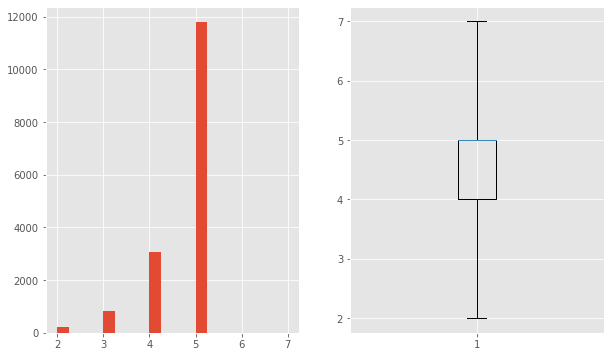

In [125]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df['Nr. of Doors'], bins = 20)

plt.subplot(122)
plt.boxplot(df['Nr. of Doors'], whis = 2.5)

plt.show()

# ***30-Nr. of Seats***

In [124]:
df["Nr. of Seats"]=df["Nr. of Seats"].apply(lambda item : item[0] if type(item)== list else item)
df["Nr. of Seats"]=df["Nr. of Seats"].str.strip('\n')
df["Nr. of Seats"]

0        5
1        4
2        4
3        4
4        5
        ..
15914    5
15915    5
15916    7
15917    7
15918    5
Name: Nr. of Seats, Length: 15919, dtype: object

In [126]:
df["Nr. of Seats"]=df["Nr. of Seats"].astype('float')

In [127]:
df["Nr. of Seats"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [132]:
df["Nr. of Seats"].mode()

0    5.0
dtype: float64

In [128]:
df["Nr. of Seats"].replace(3.0,5.0,regex=True,inplace=True)

In [129]:
df["Nr. of Seats"].replace(6.0,5.0,regex=True,inplace=True)

In [130]:
df["Nr. of Seats"].value_counts(dropna=False)

5.0    13339
4.0     1125
NaN      977
7.0      362
2.0      116
Name: Nr. of Seats, dtype: int64

In [133]:
fillallmeth(df,"make_model",  "body_type","Nr. of Seats", 'mode')

Number of NaN :  0
------------------
5.0    14311
4.0     1127
7.0      362
2.0      119
Name: Nr. of Seats, dtype: int64


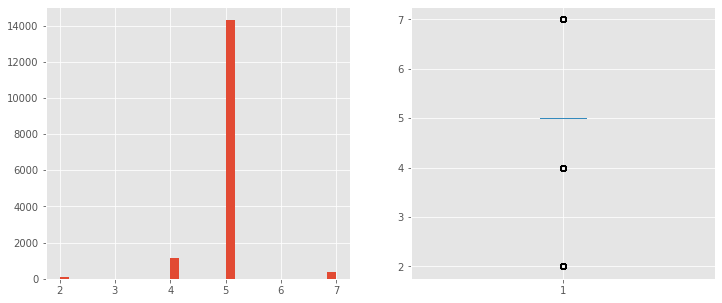

In [140]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(df['Nr. of Seats'], bins = 30)

plt.subplot(122)
plt.boxplot(df['Nr. of Seats'], whis = 2.5)

plt.show()

# ***31-Model Code***

In [ ]:
df["Model Code"]=df["Model Code"].apply(lambda item : item[0] if type(item)== list else item)
df["Model Code"]=df["Model Code"].str.strip('\n')
df["Model Code"]

0        0588/BDF
1        0588/BCY
2             NaN
3             NaN
4        0588/BDF
           ...   
15914         NaN
15915    0000/000
15916         NaN
15917         NaN
15918    3333/BHJ
Name: Model Code, Length: 15919, dtype: object

In [ ]:
df["Model Code"].value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/AOY        1
0035/BHX        1
0035/BAV        1
0035/AAD        1
1234/123        1
Name: Model Code, Length: 233, dtype: int64

In [ ]:
df.drop(["Model Code"],axis=1)#this column does not contain useful informations

# ***32-Gearing Type***

In [142]:
df["Gearing Type"]=df["Gearing Type"].apply(lambda item : item[1] if type(item)== list else item)
df["Gearing Type"]=df["Gearing Type"].str.strip('\n')
df["Gearing Type"]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing Type, Length: 15919, dtype: object

In [143]:
df["Gearing Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [ ]:
#df["Gearing Type"].str.get_dummies()

# ***33-Displacement***

In [ ]:
df["Displacement"] = [",".join(item) if type(item) == list else item for item in df["Displacement"]] 
df["Displacement"]=df["Displacement"].str.strip('\n').str.strip(' cc')
df["Displacement"]

In [66]:
df["Displacement"]=df["Displacement"].str.replace(',','', regex=True)

In [67]:
df["Displacement"]=round(((df["Displacement"].astype(float))/1000),1) #converting to float
df["Displacement"]

0        1.4
1        1.8
2        1.6
3        1.4
4        1.4
        ... 
15914    2.0
15915    1.8
15916    2.0
15917    2.0
15918    1.8
Name: Displacement, Length: 15919, dtype: float64

In [ ]:
df["Displacement"].value_counts(dropna=False)

1.6     5115
1.4     3060
1.0     2558
1.5     1409
1.2     1164
2.0     1164
NaN      496
0.9      372
1.1      289
1.8      211
0.0       38
2.5       20
0.1        7
0.2        6
1.3        3
1.7        2
1.9        2
3.0        1
16.0       1
15.9       1
Name: Displacement, dtype: int64

In [69]:
fillallmeth(df,  "Weight", "Cylinders","Displacement", "mean")

Number of NaN :  0
------------------
1.600000     5119
1.400000     3060
1.000000     2560
1.500000     1412
2.000000     1164
1.200000     1164
0.900000      372
1.100000      289
1.800000      211
1.686740       71
1.326174       66
1.295436       49
1.631670       41
1.528966       38
0.000000       38
1.578065       37
1.701665       29
2.500000       20
1.434343       18
1.085714       12
1.384244       10
1.206369       10
1.162319        9
1.251685        9
1.190018        8
0.948092        8
1.099615        7
1.137037        7
1.455474        7
0.100000        7
1.234783        6
0.200000        6
1.185714        6
1.571309        6
1.686740        5
1.640000        4
1.300000        3
1.700000        3
1.483495        3
1.612429        3
1.359509        3
1.900000        2
1.561644        2
1.828571        2
1.261905        2
15.900000       1
3.000000        1
16.000000       1
1.480000        1
1.113408        1
1.085366        1
1.585321        1
1.233333        1
1.300000

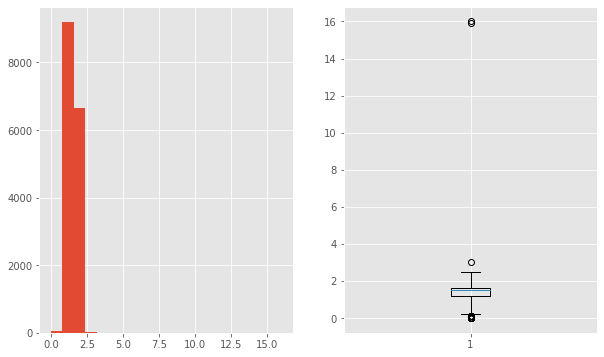

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement, whis = 2.5)

plt.show()

In [76]:
df["Displacement"].max()

15.9

In [75]:
df["Displacement"].replace([16.0],1.6,regex=True,inplace=True)

In [77]:
df["Displacement"].replace([15.9],1.6,regex=True,inplace=True)

In [78]:
df["Displacement"].max()

3.0

In [81]:
df["Displacement"].min()

0.0

In [82]:
df["Displacement"].replace([0.0],1.0,regex=True,inplace=True)

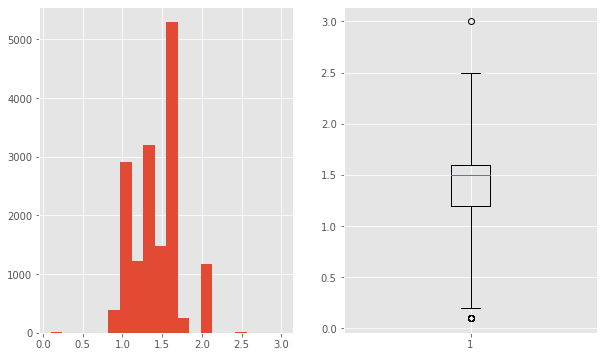

In [83]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement, whis = 2.5)

plt.show()

# ***34-Cylinders***

In [46]:
df["Cylinders"]=df["Cylinders"].apply(lambda item : item[0] if type(item)== list else item)
df["Cylinders"]=df["Cylinders"].str.strip('\n')
df["Cylinders"]

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: Cylinders, Length: 15919, dtype: object

In [47]:
df["Cylinders"]=df["Cylinders"].astype(float)

In [ ]:
df["Cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

In [56]:
fillallmeth(df, "make_model", "Weight", "Cylinders", "ffill")

Number of NaN :  0
------------------
4.0    12531
3.0     3342
5.0       23
6.0        8
8.0        7
2.0        6
1.0        2
Name: Cylinders, dtype: int64


In [57]:
df['c'].replace([1],4, inplace=True)

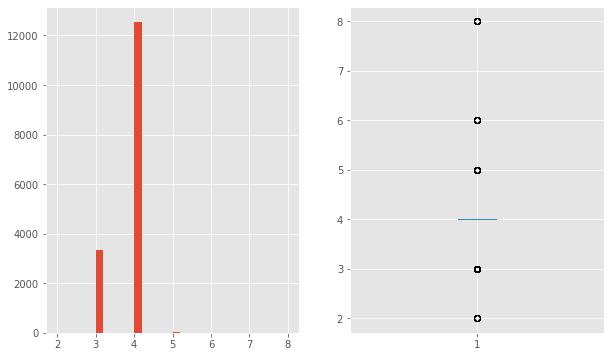

In [63]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Cylinders, bins = 30)

plt.subplot(122)
plt.boxplot(df.Cylinders, whis = 4)

plt.show()

# ***35-Weight***

In [48]:
df["Weight"] = [",".join(item) if type(item) == list else item for item in df["Weight"]] 
df["Weight"]=df["Weight"].str.strip('\n').str.strip(' kg')
df["Weight"]

0        1,220
1        1,255
2          NaN
3        1,195
4          NaN
         ...  
15914    1,758
15915    1,708
15916      NaN
15917    1,758
15918    1,685
Name: Weight, Length: 15919, dtype: object

In [49]:
df["Weight"]=df["Weight"].str.replace(',','', regex=True)
df["Weight"]

0        1220
1        1255
2         NaN
3        1195
4         NaN
         ... 
15914    1758
15915    1708
15916     NaN
15917    1758
15918    1685
Name: Weight, Length: 15919, dtype: object

In [50]:
df["Weight"]=df["Weight"].astype(float) #converting to float
df["Weight"]

0        1220.0
1        1255.0
2           NaN
3        1195.0
4           NaN
          ...  
15914    1758.0
15915    1708.0
15916       NaN
15917    1758.0
15918    1685.0
Name: Weight, Length: 15919, dtype: float64

In [ ]:
df["Weight"].value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
900.0        1
1650.0       1
1428.0       1
2355.0       1
1523.0       1
Name: Weight, Length: 435, dtype: int64

In [54]:
from numpy.lib.function_base import median
fillallmeth(df, "make_model", "body_type", "Weight", "median")

Number of NaN :  0
------------------
1163.0    1548
1350.0    1147
1623.0     878
1195.0     703
1180.0     694
          ... 
2110.0       1
1057.0       1
1430.0       1
1159.0       1
1713.0       1
Name: Weight, Length: 441, dtype: int64


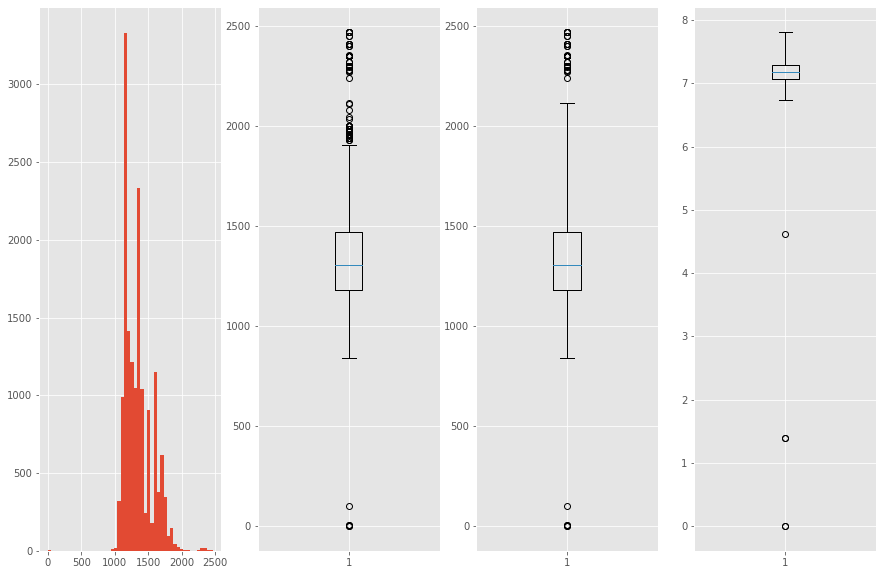

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.Weight, bins = 50)

plt.subplot(142)
plt.boxplot(df.Weight)

plt.subplot(143)
plt.boxplot(df.Weight, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.Weight), whis = 2.5)
plt.show()

In [ ]:
df["Weight"].min()

1.0

In [ ]:
df["Weight"].max()

2471.0

In [51]:
df["Weight"].replace([1], np.nan, inplace = True)

In [ ]:
fillallmeth(df, "make_model", "body_type", "Weight", "median")

# ***36-Drive chain***

In [145]:
df["Drive chain"]=df["Drive chain"].apply(lambda item : item[0] if type(item)== list else item)
df["Drive chain"]=df["Drive chain"].str.strip('\n')
df["Drive chain"]

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object

In [146]:
fillallmeth(df, "make_model", "body_type", "Drive chain", "ffill")

Number of NaN :  0
------------------
front    15575
4WD        339
rear         5
Name: Drive chain, dtype: int64


In [ ]:
#pd.get_dummies(df["Drive chain"],prefix='Drivechain',prefix_sep='_')

# ***37-Fuel***

In [147]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()


In [148]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [ ]:
df["Fuel"].unique()

array(['Diesel', 'Gasoline', 'Super 95', 'Regular', 'Super E10 95',
       'Others', 'Super Plus 98', 'CNG', 'Electric', 'Biogas',
       'Domestic gas H', 'Super Plus E10 98', 'LPG',
       'Liquid petroleum gas'], dtype=object)

In [149]:
benzine=["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg=["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
electric=["Electric"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in electric:
        return "Electric"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"]= df.Fuel.apply(fueltype)

In [ ]:
df["Fuel"].isnull().sum()

0

In [ ]:
df["Fuel"].value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [ ]:
#pd.get_dummies(df["Fuel"],prefix='Fuel',prefix_sep='_')

# ***38-Consumption***

In [ ]:
df["Consumption"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[], [], [5.6 l/100 km (country)]]                                                      1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]      1
[[3.5 l/100 km (comb)], [3.7 l/100 km (city)], [3.3 l/100 km (country)]]                1
[[3.9 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]                1
[[5.4 l/100 km (comb)], [6.1 l/100 km (city)], [5 l/100 km (country)]]                  1
Name: Cons

In [150]:
def parser1(x):
    if type(x)==float:
        return np.nan
    elif type(x[0])==list:
        if x[0] !=[]:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

In [151]:
def parser2(x):
    if type(x)==float:
        return np.nan
    elif type(x[0])==list:
        if x[1] !=[]:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

In [152]:
def parser3(x):
    if type(x)==float:
        return np.nan
    elif type(x[0])==list:
        if x[2] !=[]:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) !=list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [153]:
df['Consp_Comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Consp_City'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Consp_Country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [ ]:
df['Consp_Comb'].value_counts(dropna=False)

NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
        ... 
1.0        1
9.1        1
46.0       1
50.0       1
43.0       1
Name: Consp_Comb, Length: 73, dtype: int64

In [158]:
df['Consp_Comb'].replace(43.0,4.3, inplace=True, regex=True)

In [160]:
df['Consp_Comb'].replace(50.0,5.0, inplace=True, regex=True)

In [162]:
df['Consp_Comb'].replace(46.0,4.6, inplace=True, regex=True)

In [164]:
df['Consp_Comb'].replace(55.0,5.5, inplace=True, regex=True)

In [166]:
df['Consp_Comb'].replace(54.0,5.4, inplace=True, regex=True)

In [167]:
df['Consp_Comb'].replace(33.0,3.3, inplace=True, regex=True)

In [169]:
df['Consp_Comb'].replace(11.0,1.1, inplace=True, regex=True)

In [171]:
df['Consp_Comb'].replace(32.0,3.2, inplace=True, regex=True)

In [175]:
df['Consp_Comb'].replace(40.0,4.0, inplace=True, regex=True)

In [178]:
df['Consp_Comb'].replace(51.0,5.1, inplace=True, regex=True)

In [180]:
df['Consp_Comb'].replace(38.0,3.8, inplace=True, regex=True)

In [172]:
df['Consp_Comb'].value_counts(dropna=False)

3.9     1428
5.1      898
5.4      862
4.8      840
4.0      743
        ... 
1.1        1
13.8       1
1.2        1
7.5        1
9.1        1
Name: Consp_Comb, Length: 65, dtype: int64

In [154]:
fillallmeth(df, 'Displacement','Fuel','Consp_Comb','mode')

Number of NaN :  0
------------------
3.9     1428
5.1      898
5.4      861
4.8      840
4.0      743
        ... 
32.0       1
1.0        1
55.0       1
1.2        1
50.0       1
Name: Consp_Comb, Length: 72, dtype: int64


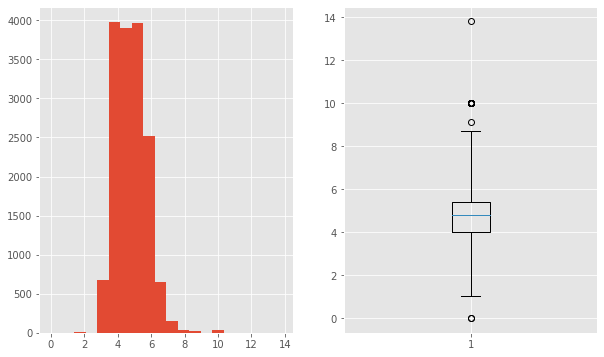

In [182]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Consp_Comb, bins = 20)

plt.subplot(122)
plt.boxplot(df.Consp_Comb, whis = 2.5)

plt.show()

In [184]:
df.drop('Consp_City', axis=1, inplace=True)

In [185]:
df.drop('Consp_Country', axis=1, inplace=True)

In [186]:
df.drop('Consumption', axis=1, inplace=True)

# ***39-CO2 Emission***

In [ ]:
df["CO2 Emission"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
[\n104 g CO2/km (comb)\n]       501
                               ... 
[\n13,983 g CO2/km (comb)\n]      1
[\n331 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n14,457 g CO2/km (comb)\n]      1
[\n190 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 123, dtype: int64

In [183]:
df["CO2 Emission"]=df["CO2 Emission"].apply(lambda item : item[0] if type(item)== list else item)
df["CO2 Emission"]=df["CO2 Emission"].str.strip('\n').str.strip('g CO2/km (comb)')
df["CO2 Emission"]

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2 Emission, Length: 15919, dtype: object

In [188]:
df["CO2 Emission"].unique()

array(['99', '129', '109', '9', '98', '97', nan, '105', '11', '103', '10',
       '95', '104', '91', '94', '117', '123', '106', '108', '121', '107',
       '101', '113', '137', '100', '116', '114', '118', '331', '115',
       '119', '90', '136', '134', '110', '111', '120', '89', '14', '126',
       '1', '128', '127', '138', '130', '125', '85', '124', '15', '88',
       '189', '194', '149', '153', '188', '36', '1,060', '96', '990',
       '146', '135', '158', '141', '17', '154', '150', '167', '174', '93',
       '133', '131', '145', '147', '156', '87', '5', '148', '139', '151',
       '144', '168', '160', '170', '80', '13', '155', '159', '0', '143',
       '140', '8', '12,324', '84', '165', '51', '157', '169', '166', '53',
       '164', '175', '190', '161', '39', '197', '184', '14,457', '199',
       '13,983', '187', '181', '186', '177', '180', '16', '45', '171',
       '183', '191', '193'], dtype=object)

In [ ]:
df.groupby("CO2 Emission")['price'].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
CO2 Emission,,,,,,,,
0,1.0,17850.000000,NaN,17850.0,17850.00,17850.0,17850.0,17850.0
1,82.0,16328.475610,3804.485716,9800.0,14000.00,15900.0,17990.0,32000.0
10,477.0,16888.635220,3033.919057,5300.0,15390.00,16500.0,18980.0,29150.0
100,36.0,10185.500000,3676.114537,5250.0,7486.75,8500.0,13230.0,17900.0
101,101.0,14196.950495,4469.316114,255.0,11990.00,14900.0,15950.0,28990.0
...,...,...,...,...,...,...,...,...
96,22.0,13155.181818,2909.454926,7899.0,11134.75,12439.5,15443.0,18879.0
97,537.0,14514.340782,2743.972479,6690.0,12955.00,14330.0,15900.0,33800.0
98,150.0,14656.840000,3572.879954,6950.0,12623.75,15725.0,16500.0,25256.0


In [189]:
df["CO2 Emission"].replace('1,060','106',regex=True, inplace=True) 

In [190]:
df["CO2 Emission"].replace('12,087','123',regex=True, inplace=True) 

In [191]:
df["CO2 Emission"].replace('13,983','140',regex=True, inplace=True) 

In [192]:
fillallmeth(df, 'Displacement','Fuel',"CO2 Emission",'mode')

Number of NaN :  0
------------------
99     1271
120    1185
10      946
97      552
104     501
       ... 
990       1
165       1
39        1
51        1
171       1
Name: CO2 Emission, Length: 117, dtype: int64


# ***40-Emission Class***

In [197]:
df["Emission Class"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [198]:
df["Emission Class"]=df["Emission Class"].apply(lambda item : item[0] if type(item)==list else item)
df["Emission Class"]=df["Emission Class"].str.strip('\n')
df["Emission Class"]=df["Emission Class"].str.replace(' ','', regex=True)

In [199]:
df["Emission Class"].value_counts()

Euro6          10139
Euro6d-TEMP     1845
Euro6c           127
Euro5             78
Euro6d            62
Euro4             40
Name: Emission Class, dtype: int64

In [200]:
df.replace({"Emission Class" : {"Euro6d-TEMP":"Euro6", "Euro6c":"Euro6", "Euro6d":"Euro6"}}, regex = True, inplace = True)

In [201]:
df["Emission Class"].isnull().sum()

3628

In [202]:
fillallmeth(df,'Fuel',"CO2 Emission","Emission Class",'mode')

Number of NaN :  0
------------------
Euro6    15801
Euro5       78
Euro4       40
Name: Emission Class, dtype: int64


In [ ]:
#pd.get_dummies(df["Emission Class"],prefix='FueEmissionClass',prefix_sep='_')

# ***41-Comfort_and_Convenience***

In [203]:
df["Comfort_and_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_and_Convenience"]]

In [204]:
df["Comfort_and_Convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: Comfort_and_Convenience, Length: 15919, dtype: object

In [205]:
fillallmeth(df,'make_model',"body_type","Comfort_and_Convenience",'mode')

Number of NaN :  0
------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                315
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                187
Air conditioning,Autom

In [ ]:
#df["Comfort_and_Convenience"].str.get_dummies(sep=",")

# ***42-Entertainment_and_Media***

In [206]:
df["Entertainment_and_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_and_Media"]]

In [ ]:
#df["Entertainment_and_Media"].str.get_dummies(sep=",")

In [208]:
fillallmeth(df,'make_model',"body_type","Comfort_and_Convenience",'mode')

Number of NaN :  0
------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                315
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                187
Air conditioning,Autom

# ***43-Extras***

In [209]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [ ]:
#df["Extras"].str.get_dummies(sep=",")

In [210]:
fillallmeth(df,'make_model',"body_type","Extras",'mode')

Number of NaN :  0
------------------
Alloy wheels                                                                                                                                 5884
Alloy wheels,Touch screen                                                                                                                     697
Alloy wheels,Voice Control                                                                                                                    582
Alloy wheels,Touch screen,Voice Control                                                                                                       544
Roof rack                                                                                                                                     538
                                                                                                                                             ... 
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Touch screen     

# ***44-Safety_and_Security***

In [211]:
df["Safety_and_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_and_Security"]]

In [ ]:
#df["Safety_and_Security"].str.get_dummies(sep=",")

In [212]:
fillallmeth(df,'make_model',"body_type","Safety_and_Security",'mode')

Number of NaN :  0
------------------
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                    729
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                               480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                         373
ABS,Central door lock,Daytime running 

# ***45-description***

In [ ]:
df["description"] = [",".join(item) if type(item) == list else item for item in df["description"]]

In [ ]:
fillallmeth(df,'make_model',"body_type","description",'mode')

Number of NaN :  0
------------------
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [213]:
df.drop(["description"],axis=1, inplace=True)

# ***46-Emission Label***

In [214]:
df["Emission Label"]=df["Emission Label"].apply(lambda item : item[0] if type(item)==list else item)
df["Emission Label"]=df["Emission Label"].str.strip('\n')
df["Emission Label"]=df["Emission Label"].str.replace(' ','', regex=True)

In [ ]:
df["Emission Label"] 

0             NaN
1        4(Green)
2        4(Green)
3             NaN
4             NaN
           ...   
15914         NaN
15915         NaN
15916         NaN
15917         NaN
15918    4(Green)
Name: Emission Label, Length: 15919, dtype: object

In [ ]:
#df["Emission Label"].str.get_dummies(sep=",")

In [215]:
fillallmeth(df,'make_model',"body_type","Emission Label",'mode')

Number of NaN :  0
------------------
4(Green)        15493
1(Nosticker)      415
5(Blue)             8
3(Yellow)           2
2(Red)              1
Name: Emission Label, dtype: int64


# ***47-Gears***

In [ ]:
df["Gears"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [216]:
df["Gears"]=df["Gears"].apply(lambda item : item[0] if type(item)==list else item)
df["Gears"]=df["Gears"].str.strip('\n')
df["Gears"]=df["Gears"].str.replace(' ','', regex=True)

In [217]:
df["Gears"]=df["Gears"].str.replace('50','5', regex=True)

In [218]:
df["Gears"]=df["Gears"].astype(float)

In [ ]:
df["Gears"].value_counts()

6.0    5822
5.0    3240
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: Gears, dtype: int64

In [219]:
df.drop(["Gears"], axis=1, inplace=True)

# ***48-Country version***

In [ ]:
df["Country version"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nCroatia\n]              4
[\nSlovakia\n]             4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nSwitzerland\n]          1
[\nLuxembourg\n]           1
[\nSerbia\n]               1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: Country version, dtype: int64

In [ ]:
df["Country version"]=df["Country version"].apply(lambda item : item[0] if type(item)==list else item)
df["Country version"]=df["Country version"].str.strip('\n')
df["Country version"]

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country version, Length: 15919, dtype: object

In [220]:
df.drop(["Country version"], axis=1,inplace=True)

# ***49-Electricity consumption***

In [ ]:
df["Electricity consumption"].value_counts()

0 kWh/100 km (comb)    137
Name: Electricity consumption, dtype: int64

In [ ]:
df["Electricity consumption"]=df["Electricity consumption"].apply(lambda item : item[0] if type(item)==list else item)
df["Electricity consumption"]=df["Electricity consumption"].str.strip('\n')
df["Electricity consumption"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Electricity consumption, Length: 15919, dtype: object

In [ ]:
df.drop(["Electricity consumption"], axis=1)

# ***50-Last Service Date***

In [ ]:
df["Last Service Date"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
[\n03/2019\n, \nEuro 6\n]                    15
                                          ...  
[\n11/2017\n, \nEuro 6d-TEMP\n]               1
[\n12/2018\n, \n5 (Blue)\n]                   1
[\n03/2019\n, \n129 g CO2/km (comb)\n]        1
[\n04/2018\n, \n110 g CO2/km (comb)\n]        1
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
Name: Last Service Date, Length: 267, dtype: int64

In [ ]:
df["Last Service Date"]=  pd.to_datetime(df["Last Service Date"])
df["Last Service Date"]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Last Service Date, Length: 15919, dtype: datetime64[ns]

In [ ]:
df["Last Service Date"]=df["Last Service Date"].apply(lambda item : item[0] if type(item)==list else item)
df["Last Service Date"]=df["Last Service Date"].str.strip('\n')
df["Last Service Date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Service Date, Length: 15919, dtype: object

In [ ]:
today=pd.to_datetime("2020-01-01")
print(today)

2020-01-01 00:00:00


In [ ]:
df['diff_year']=(today)-df["Last Service Date"]
df['diff_year']

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: diff_year, Length: 15919, dtype: timedelta64[ns]

In [ ]:
fills(df,'age', 'Inspection new',"Last Service Date" , 'mode')

In [ ]:
df['passed_months_from_last_service']=round(df['diff_year']/np.timedelta64(1, 'M'),1)

In [ ]:
df['passed_months_from_last_service'].value_counts()

In [ ]:
df['passed_months_from_last_service']=df['passed_months_from_last_service'].astype(float)

In [222]:
df.drop('Last Service Date', axis=1, inplace=True)

# ***51-Other Fuel Types***

In [ ]:
df["Other Fuel Types"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN             15039
[[], [], []]      880
Name: Other Fuel Types, dtype: int64

In [ ]:
df.drop(["Other Fuel Types"], axis=1)

# ***52-Availability***

In [ ]:
df["Availability"].value_counts(dropna=False)

NaN    15284
90       196
120      182
1         51
3         35
5         35
180       24
14        24
7         20
150       18
2         16
60        13
42        10
21         8
4          2
6          1
Name: Availability, dtype: int64

In [ ]:
df["Availability"]=df["Availability"].apply(lambda item : item[0] if type(item)==list else item)
df["Availability"]=df["Availability"].str.strip('\n').str.strip(' days from ordering').str.strip('nin ')
df["Availability"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915      5
15916    120
15917    NaN
15918    NaN
Name: Availability, Length: 15919, dtype: object

In [ ]:
df.drop(["Availability"], axis=1)

# ***53-Last Timing Belt Service Date***

In [ ]:
df["Last Timing Belt Service Date"].value_counts(dropna=False)

NaT           15903
2016-04-01        2
2019-06-01        1
2019-05-01        1
2018-05-01        1
2017-06-01        1
2019-04-01        1
1900-12-01        1
2018-09-01        1
1900-01-01        1
2018-07-01        1
2019-02-01        1
2019-01-01        1
2018-02-01        1
2018-01-01        1
1970-01-01        1
Name: Last Timing Belt Service Date, dtype: int64

In [ ]:
df["Last Timing Belt Service Date"]=df["Last Timing Belt Service Date"].apply(lambda item : item[0] if type(item)==list else item)
df["Last Timing Belt Service Date"]=df["Last Timing Belt Service Date"].str.strip('\n')
df["Last Timing Belt Service Date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Timing Belt Service Date, Length: 15919, dtype: object

In [ ]:
df["Last Timing Belt Service Date"]=  pd.to_datetime(df["Last Timing Belt Service Date"])
df["Last Timing Belt Service Date"]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Last Timing Belt Service Date, Length: 15919, dtype: datetime64[ns]

In [ ]:
df["Last Timing Belt Service Date"].unique()

array([                          'NaT', '1900-12-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '1900-01-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df.drop(["Last Timing Belt Service Date"], axis=1)

# ***54-Available from***

In [ ]:
df["Available from"].value_counts(dropna=False)

In [ ]:
df["Available from"]=df["Available from"].apply(lambda item : item[0] if type(item)==list else item)
df["Available from"]=df["Available from"].str.strip('\n')
df["Available from"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Available from, Length: 15919, dtype: object

In [ ]:
df.drop(["Available from"], axis=1)

In [228]:
Autoscout24_last=df